In [20]:
import pandas as pd

true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

true_df.head(), fake_df.head()


(                                               title  \
 0  As U.S. budget fight looms, Republicans flip t...   
 1  U.S. military to accept transgender recruits o...   
 2  Senior U.S. Republican senator: 'Let Mr. Muell...   
 3  FBI Russia probe helped by Australian diplomat...   
 4  Trump wants Postal Service to charge 'much mor...   
 
                                                 text       subject  \
 0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
 1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
 2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
 3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
 4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
 
                  date  
 0  December 31, 2017   
 1  December 29, 2017   
 2  December 31, 2017   
 3  December 30, 2017   
 4  December 29, 2017   ,
                                                title  \
 0   Donald Trump Se

In [21]:
true_df['label'] = 1      # Real news
fake_df['label'] = 0      # Fake news

df = pd.concat([true_df, fake_df], ignore_index=True)

df.shape


(44898, 5)

In [22]:
df['clean_text'] = df['title'] + " " + df['text']


In [23]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()                     # lowercase
    text = re.sub(r'[^\w\s]', '', text)          # punctuation remove
    text = " ".join([w for w in text.split() if w not in stop_words])  # stopwords remove
    return text

df['clean_text'] = df['clean_text'].apply(clean_text)

df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,text,subject,date,label,clean_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,us budget fight looms republicans flip fiscal ...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,us military accept transgender recruits monday...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,senior us republican senator let mr mueller jo...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,fbi russia probe helped australian diplomat ti...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,trump wants postal service charge much amazon ...


In [24]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 35918
Testing samples: 8980


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF done. Shape:", X_train_tfidf.shape)


TF-IDF done. Shape: (35918, 5000)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression(max_iter=200)
lr.fit(X_train_tfidf, y_train)

lr_pred = lr.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


Logistic Regression Accuracy: 0.9897550111358575
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [27]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

svm_pred = svm.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


SVM Accuracy: 0.9953229398663697
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       0.99      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



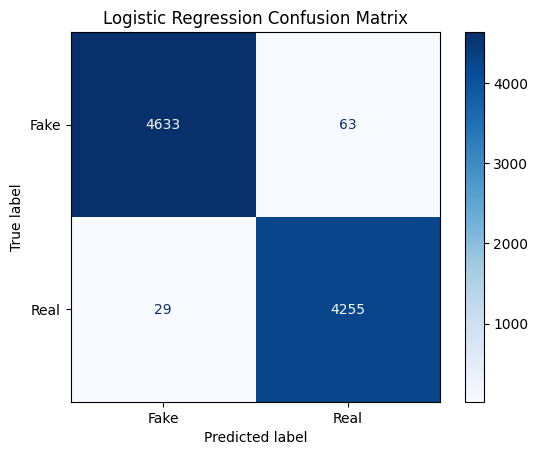

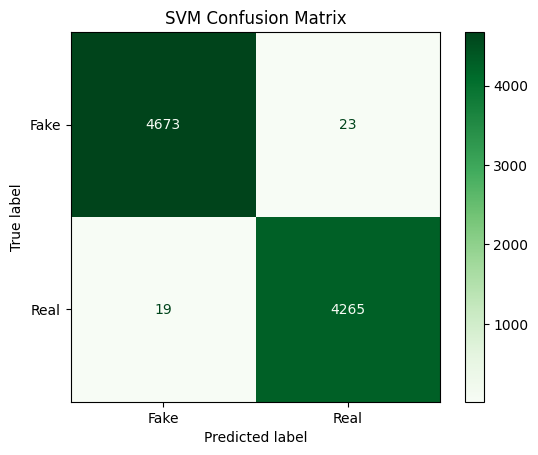

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Logistic Regression
cm_lr = confusion_matrix(y_test, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Fake','Real'])
disp.plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# SVM
cm_svm = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Fake','Real'])
disp.plot(cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()


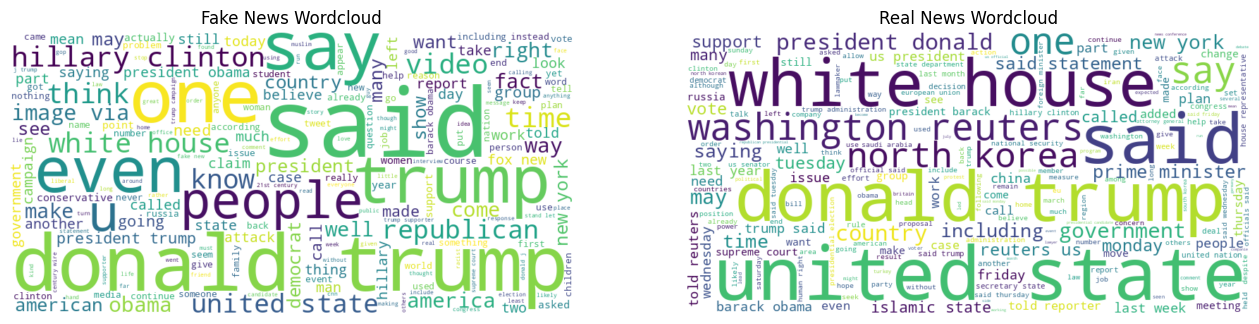

In [31]:
from wordcloud import WordCloud

# Fake news
fake_text = " ".join(df[df['label']==0]['clean_text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

# Real news
real_text = " ".join(df[df['label']==1]['clean_text'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)

# Plot
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Fake News Wordcloud")

plt.subplot(1,2,2)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title("Real News Wordcloud")

plt.show()


In [32]:
import shap
import numpy as np

# Sample subset (poora dataset heavy hoga)
sample_idx = np.random.choice(X_test_tfidf.shape[0], size=min(200, X_test_tfidf.shape[0]), replace=False)
X_sample = X_test_tfidf[sample_idx].toarray()   # convert to dense array

# Logistic Regression explainer
explainer = shap.LinearExplainer(lr, X_train_tfidf.toarray())
shap_values = explainer.shap_values(X_sample)

# shap_values is 2D array for binary classification: [num_samples, num_features]
# Take first sample
shap_vals_sample = shap_values[0]  # first sample (1D array)

feature_names = tfidf.get_feature_names_out()
top_indices = np.argsort(np.abs(shap_vals_sample))[-10:][::-1]  # top 10 indices

print("Top 10 words influencing the first prediction:")
for i in top_indices:
    print(feature_names[i], "->", shap_vals_sample[i])


Top 10 words influencing the first prediction:
said -> 0.6290193655042048
clintons -> 0.6118889125867871
us -> 0.49769543961713547
presidential -> 0.3421800559476424
happened -> -0.2841653096128408
reuters -> 0.2835213982444671
trumps -> 0.2672791877452474
clinton -> -0.2157080361588617
election -> 0.20546715166371476
im -> 0.1981847581265736


In [33]:
# Lemmatization + keeping bigrams
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def clean_text_advanced(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)   # remove punctuation
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(words)

df['clean_text_advanced'] = (df['title'] + " " + df['text']).apply(clean_text_advanced)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
